**Station location plotting using FITS (FIeld Time Series) database**

In this notebook we will look at discovering the location of sites in the FITS (FIeld Time Series) database. However, as the Python packages we have used previously are not capable of handling SVG files (the format FITS uses for its maps), we will need a few extra packages to handle SVG images pulled from the web: [cairosvg](http://cairosvg.org/), io, and [PIL](https://pillow.readthedocs.io/en/latest/).

Before downloading any packages or running any code, take a look at the map at the bottom of this notebook. Through some clever Python scripting you too could plot this figure, but it may prove easier to just build the URL and save the figure from the FITS web service!

If you do want to run the code, first import the packages we need:

In [1]:
# Import packages

import cairosvg
import io
from PIL import Image
import matplotlib.pyplot as plt

We will now plot the locations of a list of sites. The FITS API for maps takes a comma separated list of sites, so we will need to shape this list before we insert it into the query. The map query takes this site list and one other argument: the plotting region. The plotting region sets the map extent, and while it is optional the alternative is to allow the automatic system to take over (which doesn't always work as expected). The regions available are:
- ChathamIsland
- LakeTaupo
- NewZealand
- NewZealandRegion
- RaoulIsland
- WhiteIsland
- latmin, longmin, latmax, longmax (i.e. a user-defined extent)

The default region is NewZealand.

Let's set our sites and region:

In [2]:
sites = ['AUCK', 'WGTN', 'MQZG', 'DUND']
region = 'NewZealand'
#region = '165,-48,-175,-34' # uncomment and change this if a user-defined extent is desired

Now we will build the query and plot the result. As python's SVG plotting ability is limited (even with matplotlib), we will use the combination of cairosvg - which will convert our query result into a PNG image - io - which will store the PNG in the system's memory - and PIL - which will allow us to convert the PNG in system memory into a plottable object in matplotlib.

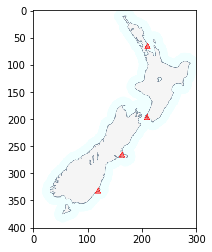

In [3]:
# Build query

query_suffix = ''

for site in sites:
    
    query_suffix += site + ','
    
query_suffix = query_suffix[:-1]
    
URL = 'http://fits.geonet.org.nz/map/site?sites=' + query_suffix + '&bbox=' + region + '&width=300'

# Open image from query result

# Create a file-object in the system memory

memory_stream = io.BytesIO()

# Convert the SVG returned by our query into a PNG stored in the file-object

cairosvg.svg2png(url = URL, write_to = memory_stream)

# Return the memory buffer to the start of the file object

memory_stream.seek(0)

# Use PIL to open the PNG in an easy to use format

im = Image.open(memory_stream)

# Plot the PNG using matplotlib

plt.imshow(im)
plt.show()

In this map all water-land borders are drawn and each station's location is overlain as a red triangle. Station labels cannot be added due to the loss of information in the SVG -> PNG translation, so while this map shows where the stations are located, we cannot distinguish which station is which! For this we'll need a much more sophisticated plotting system. The best alternative is to run the cell below and to click on the URL output - this gives the map above, but in the web browser hovering your mouse over a station will show its name.

If you want to see a higher resolution map, change the width specified in the query to something >300. This width is the number of pixels wide the PNG image will be, so it can be increased - but be warned: too many pixels will make the station locations very small!

In [4]:
print(URL)

http://fits.geonet.org.nz/map/site?sites=AUCK,WGTN,MQZG,DUND&bbox=NewZealand&width=300
